# # QUESTION 1

****Top5 cities according to number of investments received****

Bangalore 627
Mumbai 446
New Delhi 381
Gurgaon 240
Noida 78


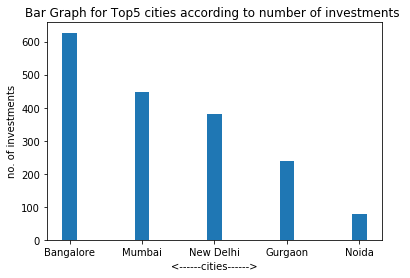

In [27]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv(r'C:\Users\Sarthak\Desktop\data science\data sets\startup_funding.csv',encoding='utf-8') #reading file
sf=data.copy()
city=sf.CityLocation
city=city.dropna() # dropping nan
f={}
for i in city:
    i=str(i)
    i=i.split('/')[0].strip()                 #spliting the city names 
    if i=='Delhi':                            #correcting the city names
        i='New Delhi'
    if i=='bangalore':
        i='Bangalore'
maincity=[]

for i in city:
    if i== 'Bangalore' or i=='Mumbai' or i=='New Delhi' or i=='Gurgaon' or i=='Noida':  #filtering the cities as per req.
        maincity.append(i)
        
for i in maincity:                            #creating dictionary
    if i in f:
        f[i]+=1
    else:
        f[i]=1
c=[]
count=[]
for i in f:                              #appending the city name and its count of funding received in lists
    c.append(i)
    count.append(f[i])
count.sort(reverse=True)
print("****Top5 cities according to number of investments received****")
print()
for i in range(5):                     #printing the city name and no. of funding received
    print(c[i],count[i])  
plt.bar(c,count,width=0.2)            #ploting the bar graph
plt.ylabel('no. of investments')
plt.xlabel('<------cities------>')
plt.title("Bar Graph for Top5 cities according to number of investments ")
plt.show()


# #QUESTION 2

******Top5 investors according to number of investments made by them******* 

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


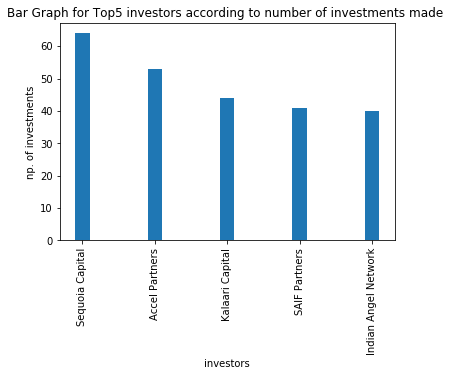

In [28]:
df=data.copy()
df['InvestorsName'].dropna(inplace=True) # dropping nan
inv=df['InvestorsName']
inv
inv=inv.values
#print(len(inv))
li=[]
for i in inv:
        a=i.split(',')   #spliting the investors
        for j in a:
            li.append(j.strip())
#print(len(li))
f={}                    # creating dictionary of investors
for i in li:
    if i in f:
        f[i]+=1
    else:
        f[i]=1
investor=[]
times=[]
investor=sorted(f, key=f.get, reverse=True)[:5]   #sorting the dictionary and finding the top 5 investors
for i in investor:
    for j in f:
        if i==j:
            times.append(f[i])
print("******Top5 investors according to number of investments made by them******* ")
print()
for i in range(5):
    print(investor[i],times[i])  
plt.bar(investor,times,width=0.2)        #printing the bar graph
plt.xticks(rotation=90)
plt.ylabel('np. of investments')
plt.xlabel('investors')
plt.title("Bar Graph for Top5 investors according to number of investments made ")
plt.show()

# # QUESTION 3

*****Top5 investors with investment in diff startups*****

Sequoia Capital 49
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


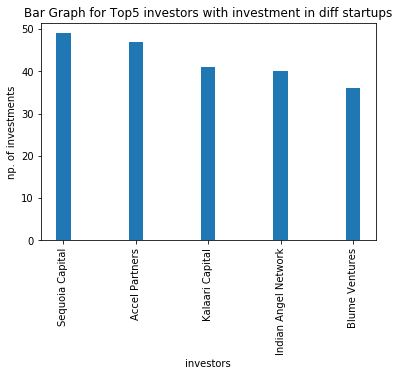

In [30]:
x=data.copy()
x['StartupName'].fillna("",inplace=True)             #nans filled for both startupname and investor name 
x['InvestorsName'].fillna("",inplace=True)
     
        
x['StartupName'].replace("Ola Cabs",'Ola',inplace=True)
x['StartupName'].replace("Olacabs",'Ola',inplace=True)
x['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)      #important names corrected for startup
x['StartupName'].replace("Oyo Rooms","Oyo",inplace=True)
x['StartupName'].replace("OyoRooms","Oyo",inplace=True)
x['StartupName'].replace("Oyorooms","Oyo",inplace=True)
x['StartupName'].replace("Paytm Marketplace","Paytm",inplace=True)

d={}
startups=x['StartupName']
investors=x['InvestorsName']
for i in range(len(x['StartupName'])):       #use of loop to create dict entries with key as investor name
    s=startups[i]
    r=investors[i]                             
    if "," in r:
        r=r.split(",")                          
        for j in r:
            t=j.strip()
            if t!="":                           #some startups funded by many so names are stripped and then added with comma in between
                if t in d:
                    d[t]=d[t]+","+s
                else:
                    d[t]=s
    else:
        if r!="":
            if r in d:
                d[r]=d[r]+","+s
            else:
                d[r]=s

for i in d:
    temp=d[i]
    #print(temp)
    temp=temp.split(",")
    #print(temp)
    temp=list(dict.fromkeys(temp))          #this looop is been used to sepeeate every funding done by investor and then remove duplicates that refer to same startup funded different times
    #print(temp)
    d[i]=len(temp)
    #print(d[i])

investor_count=[]
#print(d.values)
for i in sorted(d.values(),reverse=True):
    if len(investor_count)==5:               #only five values used as per question to hold the count top 5 from dict d
        break
    else:
        investor_count.append(i)
investor_name=[]
for i in investor_count:
    for j in d:                                             #investor name added to the investor_name list that hold value to respoding investor_count
        if d[j]==i:
            investor_name.append(j)
print("*****Top5 investors with investment in diff startups*****")
print()
for i in range(5):
    print(investor_name[i],investor_count[i])            #values printed
plt.bar(investor_name,investor_count,width=0.2)
plt.xticks(rotation=90)
plt.ylabel('np. of investments')
plt.xlabel('investors')
plt.title("Bar Graph for Top5 investors with investment in diff startups")
plt.show()



# # QUESTION 4

****Top 5 Investors with investment in diff startups and their Investment Type is Seed Funding or Crowd Funding are:****

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


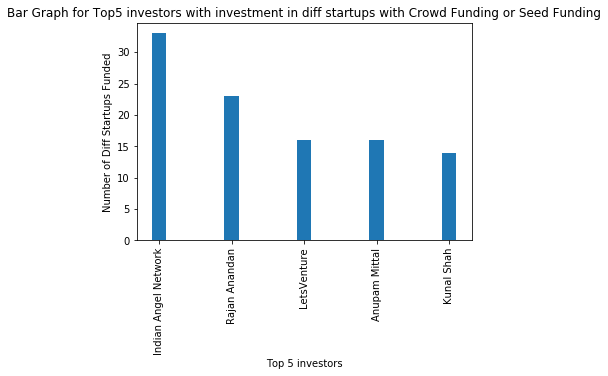

In [32]:
from collections import Counter


df5= data.copy()

#removing undisclosed investors

df5["InvestorsName"].replace("Undisclosed Investors","",inplace=True)
df5["InvestorsName"].replace("Undisclosed investors","",inplace=True)
df5["InvestorsName"].replace("", np.nan, inplace = True)
df5.dropna(inplace=True, subset=["InvestorsName"])


#removing no broker from startups

df5["StartupName"].replace("NoBroker",np.nan,inplace=True)
df5["StartupName"].dropna(inplace=True)

# correcting startup names
df5["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df5["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df5["StartupName"].replace("Olacabs","Ola",inplace=True)
df5["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)

df5["StartupName"].replace("OyoRooms","Oyo",inplace=True)

df5["StartupName"].replace("Oyorooms","Oyo",inplace=True)

df5["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df5["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)

#correctibg investment types

df5["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df5["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df5["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)
df5["InvestmentType"].dropna(inplace=True)

# reset index of df5 pandas


df5.reset_index(drop=True,inplace=True)       


#creating a dictionary with startup name as key and values of unique investors only no repeated investor



dict_startups={}
for i in range(len(df5["InvestorsName"])):
    
    if (df5["InvestmentType"][i]=="Crowd Funding") | (df5["InvestmentType"][i]=="Seed Funding"):
        
    
        if  df5["StartupName"][i] not in dict_startups:

            dict_startups[df5["StartupName"][i]]=[]

            if "," not in df5["InvestorsName"][i] :

                dict_startups[df5["StartupName"][i]].append(df5["InvestorsName"][i])

            else:
                inv_each= (df5["InvestorsName"][i]).strip().split(",")
                for j in inv_each:

                    dict_startups[df5["StartupName"][i]].append(j.strip())

        else:

            if "," not in df5["InvestorsName"][i] :
                if df5["InvestorsName"][i] in dict_startups[df5["StartupName"][i]]:
                    continue

                else:

                    dict_startups[df5["StartupName"][i]].append(df5["InvestorsName"][i])

            else:

                inv_each= (df5["InvestorsName"][i]).strip().split(",")
                for j in inv_each:
                    if j in dict_startups[df5["StartupName"][i]]:
                        continue
                    else:

                        dict_startups[df5["StartupName"][i]].append(j.strip())


# creating another dictionary with keys as investor name and values as their count of investment in diff startups

inv_count_dict={}

for values in dict_startups.values():
    
      
    for x  in range(len(values)):
        
        
        if values[x] == "":
            continue
        inv_count_dict[values[x]]=inv_count_dict.get(values[x],0)+1
        
#printing top 5 investors with their count
print("****Top 5 Investors with investment in diff startups and their Investment Type is Seed Funding or Crowd Funding are:****")  
print()
inv_arr=[]
count_arr=[]

for investor, count in dict(Counter(inv_count_dict).most_common(5)).items():
    print(investor,count)
    inv_arr.append(investor)
    count_arr.append(count)
    
plt.bar(inv_arr,count_arr,width=0.2)          #ploting the bar graph
plt.xticks(rotation="vertical")
plt.xlabel("Top 5 investors")
plt.ylabel("Number of Diff Startups Funded")
plt.title("Bar Graph for Top5 investors with investment in diff startups with Crowd Funding or Seed Funding")
plt.show()



# # QUESTION 5

****Top5 investors with investment in diff startups with investment type private equity*****

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


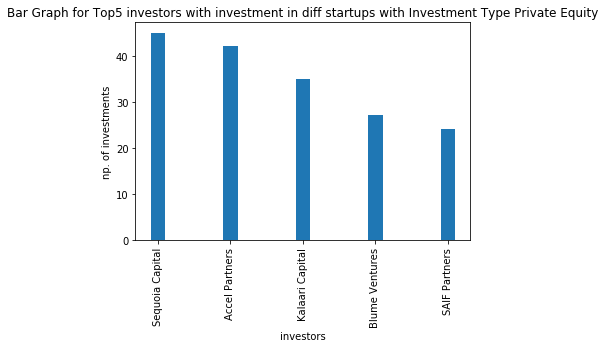

In [33]:
x=data.copy()
x['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
x['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
x['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)       
x['StartupName'].replace("Ola Cabs",'Ola',inplace=True)
x['StartupName'].replace("Olacabs",'Ola',inplace=True)
x['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)     
x['StartupName'].replace("Oyo Rooms","Oyo",inplace=True)                     #important names corrected for startup
x['StartupName'].replace("OyoRooms","Oyo",inplace=True)
x['StartupName'].replace("Oyorooms","Oyo",inplace=True)
x["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
x['StartupName'].replace("Paytm Marketplace","Paytm",inplace=True)
x["InvestorsName"].replace("Undisclosed Investors","",inplace=True)
x["InvestorsName"].replace("Undisclosed investors","",inplace=True)

x['StartupName'].fillna("",inplace=True)             
x['InvestorsName'].fillna("",inplace=True)                         #nans filled for both startupname and investor name 
x=x[x['InvestmentType'] == 'Private Equity']                       #filtering for private equity
     

d={}
startups=x['StartupName'].values
investors=x['InvestorsName'].values
# print(startups)
# print(investors)
for i in range(len(x['StartupName'])):                        #use of loop to create dict entries with key as investor name
#     print(i)
    s=startups[i]
    r=investors[i]
    if not('Undisclosed' in investors[i] or 'undisclosed' in investors[i]):
        if "," in r:
            r=r.split(",")                  
            for j in r:
                t=j.strip()
                if t!="":                   #some startups funded by many so names are stripped and then added with comma        
                    if t in d:
                        d[t]=d[t]+","+s
                    else:
                        d[t]=s
        else:
            if r!="":
                if r in d:
                    d[r]=d[r]+","+s
                else:
                    d[r]=s

for i in d:
    temp=d[i]
    #print(temp)
    temp=temp.split(",")
    #print(temp)
    temp=list(dict.fromkeys(temp))          #this looop is been used to separate every funding done by investor and then remove duplicates that refer to same startup funded different times
    #print(temp)
    d[i]=len(temp)
    #print(d[i])

investor_count=[]
#print(d.values)
for i in sorted(d.values(),reverse=True):
    if len(investor_count)==5:             #only five values used as per question to hold the count top 5 from dict d  
        break
    else:
        investor_count.append(i)
investor_name=[]
for i in investor_count:
    for j in d:                            #investor name added to the investor_name list that hold value to respoding investor_count                 
        if d[j]==i:
            investor_name.append(j)
print("****Top5 investors with investment in diff startups with investment type private equity*****")
print()
for i in range(5):
    print(investor_name[i],investor_count[i])  #values printed
    
plt.bar(investor_name,investor_count,width=0.2)    #ploting bar graph
plt.xticks(rotation=90)
plt.ylabel('np. of investments')
plt.xlabel('investors')
plt.title("Bar Graph for Top5 investors with investment in diff startups with Investment Type Private Equity")

plt.show()




